In [1]:
import nltk
import urllib.request
from bs4 import BeautifulSoup

In [2]:
#obtener el contenido HTML de la pagina web 
res = urllib.request.urlopen("https://www.cerveza-artesanal.co/")

In [3]:
#leer la informaicon obtenida, objeto HTML
html = res.read()

In [4]:
#limpiar el texto HTML capturado
# soup = BeautifulSoup(html,"html5lib")
soup = BeautifulSoup(html,"html.parser")

In [8]:
StrA = ''
for par in soup.find_all('p'):
    StrA += "".join(par.text)+'\n'
    #print(par.text)
print(StrA)

Consejos y artículos sobre preparación de cerveza casera
Esta es una nueva interpretación moderna del estilo Gose. La combinación de la acidez láctica generada por los lactobacilos y el perfil salino hacen que estas cervezas sean muy refrescantes, y la adición de frutas tropicales las llevan a otro nivel.
Ya he venido experimentando con mango maduro, mango biche y frutos rojos en cervezas ácidas, así como guayaba, maracuyá, frambuesas, y otras frutas en IPAs y otras cervezas limpias. Para esta receta decidí utilizar guayaba y mango por los sabores y aromas intensos que aportan ambas frutas, además que juntas añaden complejidad a la cerveza.
Agotado un poco de experimentar con NEIPAs, y de gastar grandes cantidades de lúpulo en esas cervezas, me propuse a repasar cervezas IPA clásicas que me generaron gran impacto en el 2010.
Mitch Steele – antiguo maestro cervecero de Stone Brewing – comparte varias recetas de esta cervecería en su libro sobre IPAs. Sin embargo, estas recetas no indica

In [5]:
text = soup.get_text(strip=True)

In [6]:
# text

### TOKENIZAR

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
#extraer tokens
tokens = word_tokenize(text,"spanish")

In [9]:
tokens = [word.lower() for word in tokens if word.isalpha() and len(word) > 1 ]

In [10]:
# tokens

### FRECUENCIA DE PALABRAS

In [11]:
def frecuenciaPalabras(tokens):
    freq = nltk.FreqDist(tokens)
    for palabra,valor in freq.items():
        print(f"{palabra}: {valor}")
    return freq


In [12]:
freq = frecuenciaPalabras(tokens)

recetas: 8
consejos: 1
para: 16
preparar: 1
cerveza: 18
artesanal: 3
en: 43
casair: 1
al: 1
contenidocómo: 1
hacer: 7
casaconsejos: 1
artículos: 1
sobre: 6
preparación: 4
de: 103
caseramenúrecetas: 1
cervezabelgian: 2
alesbrown: 2
alesipasneipaspale: 2
alesporterssaisonssours: 2
ácidasstoutscómo: 2
cervezareceta: 2
base: 5
litrosreceta: 2
litrostipos: 2
maltatipos: 2
lúpuloequipo: 2
mínimo: 2
requeridoconsejosgose: 1
con: 24
guayaba: 7
mangoesta: 1
es: 5
una: 7
nuevainterpretación: 1
modernadel: 1
estilogose: 1
la: 42
combinación: 1
acidez: 1
láctica: 1
generada: 1
por: 14
los: 9
lactobacilos: 2
el: 24
perfil: 2
salino: 1
hacen: 1
que: 15
estas: 3
cervezas: 14
sean: 1
muy: 3
refrescantes: 1
laadición: 1
frutastropicales: 1
las: 12
llevan: 1
otro: 1
he: 2
venido: 1
experimentando: 1
conmango: 1
maduro: 1
mango: 9
bichey: 1
frutos: 1
rojos: 1
ácidas: 1
así: 1
como: 3
maracuyá: 2
frambuesas: 1
otras: 3
frutas: 4
ipas: 3
limpias: 1
esta: 6
receta: 1
decidí: 1
utilizar: 2
sabores: 6
aromas:

In [13]:
import matplotlib.pyplot as plt

def vizualizarTokens(tokens):
    tokens.plot(30,cumulative=False)

In [14]:
# freq

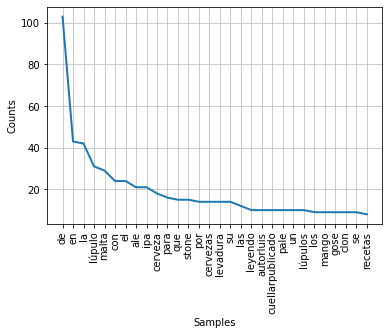

In [15]:
vizualizarTokens(freq)

### ELIMINAR PALABRAS DE PARADA

In [19]:
from nltk.corpus import stopwords

In [20]:
Tokens_limpios = tokens[:]

for token in tokens:
    if token in stopwords.words("spanish"):
        Tokens_limpios.remove(token)

In [21]:
 len(Tokens_limpios)

1012

In [22]:
frecuencia_limpia = frecuenciaPalabras(Tokens_limpios)

recetas: 8
consejos: 1
preparar: 1
cerveza: 18
artesanal: 3
casair: 1
contenidocómo: 1
hacer: 7
casaconsejos: 1
artículos: 1
preparación: 4
caseramenúrecetas: 1
cervezabelgian: 2
alesbrown: 2
alesipasneipaspale: 2
alesporterssaisonssours: 2
ácidasstoutscómo: 2
cervezareceta: 2
base: 5
litrosreceta: 2
litrostipos: 2
maltatipos: 2
lúpuloequipo: 2
mínimo: 2
requeridoconsejosgose: 1
guayaba: 7
mangoesta: 1
nuevainterpretación: 1
modernadel: 1
estilogose: 1
combinación: 1
acidez: 1
láctica: 1
generada: 1
lactobacilos: 2
perfil: 2
salino: 1
hacen: 1
cervezas: 14
refrescantes: 1
laadición: 1
frutastropicales: 1
llevan: 1
venido: 1
experimentando: 1
conmango: 1
maduro: 1
mango: 9
bichey: 1
frutos: 1
rojos: 1
ácidas: 1
así: 1
maracuyá: 2
frambuesas: 1
frutas: 4
ipas: 3
limpias: 1
receta: 1
decidí: 1
utilizar: 2
sabores: 6
aromas: 2
intensos: 2
aportan: 1
ambas: 1
además: 4
juntas: 1
añaden: 1
complejidad: 1
leyendo: 10
gose: 9
autorluis: 10
cuellarpublicado: 10
febrero: 2
cervezaetiquetasgose: 

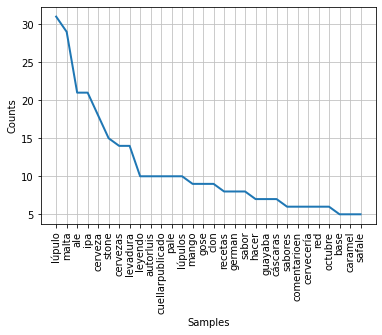

In [23]:
vizualizarTokens(frecuencia_limpia)

### DEFINICION Y EJEMPLO DE PALABRAS CON WORDNET

In [24]:
# from nltk.corpus import wordnet #importa la base de datos wordnet
# syn = wordnet.synsets("hot")

# print(syn[0].definition())
# print(syn[0].examples())

### SINONIMOS

In [25]:
# # Ejemplo con la palabra "investment"
# from nltk.corpus import wordnet

# sinonimos = []

# for syn in wordnet.synsets('investment'):#dentro de wordnet para la palabra investment
#     for lemma in syn.lemmas():#extraer todos los lemas que contengan como sinonimo esa palabra
#         sinonimos.append(lemma.name())
# print(sinonimos)

In [26]:
# #reemplazar tokens sinonimos
# #en tokens_limpios recorremos cada palabra y la reemplazamos por la palabra indicada si coincide

# for ind, _ in enumerate(sinonimos):
#     sin_tokens_limpios = [word.replace(sinonimos[ind],"investment") for word in Tokens_limpios]

In [27]:
# sin_tokens_limpios

### Reemplazar sinonimos Manuelamente

In [28]:
sinonimos = ["etiquetas"]

for ind,sin in enumerate(sinonimos):
    sin_tokens_limpios = [word.replace(sinonimos[ind],"cerveza") for word in Tokens_limpios]

In [30]:
len(sin_tokens_limpios)

1012

In [31]:
freq = frecuenciaPalabras(sin_tokens_limpios)

recetas: 8
consejos: 1
preparar: 1
cerveza: 18
artesanal: 3
casair: 1
contenidocómo: 1
hacer: 7
casaconsejos: 1
artículos: 1
preparación: 4
caseramenúrecetas: 1
cervezabelgian: 2
alesbrown: 2
alesipasneipaspale: 2
alesporterssaisonssours: 2
ácidasstoutscómo: 2
cervezareceta: 2
base: 5
litrosreceta: 2
litrostipos: 2
maltatipos: 2
lúpuloequipo: 2
mínimo: 2
requeridoconsejosgose: 1
guayaba: 7
mangoesta: 1
nuevainterpretación: 1
modernadel: 1
estilogose: 1
combinación: 1
acidez: 1
láctica: 1
generada: 1
lactobacilos: 2
perfil: 2
salino: 1
hacen: 1
cervezas: 14
refrescantes: 1
laadición: 1
frutastropicales: 1
llevan: 1
venido: 1
experimentando: 1
conmango: 1
maduro: 1
mango: 9
bichey: 1
frutos: 1
rojos: 1
ácidas: 1
así: 1
maracuyá: 2
frambuesas: 1
frutas: 4
ipas: 3
limpias: 1
receta: 1
decidí: 1
utilizar: 2
sabores: 6
aromas: 2
intensos: 2
aportan: 1
ambas: 1
además: 4
juntas: 1
añaden: 1
complejidad: 1
leyendo: 10
gose: 9
autorluis: 10
cuellarpublicado: 10
febrero: 2
cervezacervezagose: 1


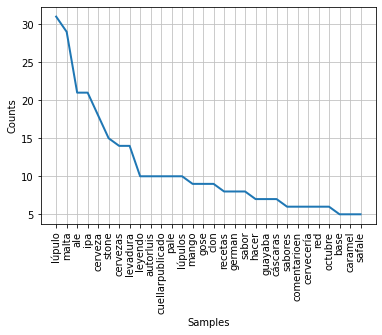

In [32]:
vizualizarTokens(freq)

### ANTONIMOS

In [33]:
# from nltk.corpus import wordnet

# antonyms = []

# for syn in wordnet.synsets('good'):#recorra wordnet buscando la palabra 
#     for l in syn.lemmas(): #asocie los lemas que tenga la palabra
  
#         if l.antonyms():# si la palabra tiene antonimo
#             antonyms.append(l.antonyms()[0].name())#almacenar el antonimo en el vector
# print(antonyms)

### DERIVACION REGRESIVA (WORD STEMMING ) := ENCONTRAR PALABRA RAIZ

In [34]:
# algoritmo porter de derivacion regrsiva, el mas utilizado --> importar modulo porterstemmer
from nltk.stem import PorterStemmer

stemmer = PorterStemmer() # se crea un objeto de derivacion regresiva, stemmer
print(stemmer.stem('working'))

print(stemmer.stem('drinking'))

work
drink


- PorterStemmer solo esta para palabras en ingles, para palabras en español se puede utilizar SnowballStemmer

In [35]:
from nltk.stem import SnowballStemmer
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


En español

In [36]:
from nltk.stem import SnowballStemmer

stemmer_español = SnowballStemmer("spanish")#crearmos una instancia de l Snowballstemmer

print(stemmer_español.stem("trabajando"))
print(stemmer_español.stem("estudiando"))
print(stemmer_español.stem("Farriar"))

trabaj
estudi
farri


Aplicar al ejemplo

In [37]:
# sin_tokens_limpios_stems = [stemmer_español.stem(token) for token in sin_tokens_limpios]

In [38]:
# sin_tokens_limpios_stems

In [40]:
# freq_stems = frecuenciaPalabras(sin_tokens_limpios_stems)

In [41]:
# vizualizarTokens(freq_stems)

### LEMATIZAR PALABRAS

In [42]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

print(lemmtizer.lemmatize("increases"))

increase


In [43]:
print(lemmtizer.lemmatize("working",pos="v"))
#sustantivos de manera predeterminada, especificar 'v'  si se quieren los verbos

work


### LEMATIZAR EN ESPAÑOL . INTALAR SPACY Y PAQUETES DE IDIOMAS

In [44]:
# Utilizar solo los tokens limpios, no solo con las raices (paso alternativo)
#tenemos que darle todas los tokens que tenemos en un string -> juntar en una cadena 
#separador.join(sin_tokens_limpio)

import spacy
import es_core_news_sm

nlp = es_core_news_sm.load()#instancia

sin_tokens_limpios_lem = []

separador = " "
cadena = (separador.join(sin_tokens_limpios))#string


In [45]:
#cadena

In [46]:
cadena2 = nlp(cadena)

for token in cadena2:
    print(token.text,token.lemma_,token.pos_)# token, lema, indicador
    sin_tokens_limpios_lem.append(token.lemma_)# le añadimos cada uno de los lemas a la lista

OPN
mosaic mosaic PROPN
malta malta PROPN
pale pale PROPN
ale ale SCONJ
malta malta VERB
rye rye PROPN
malta malta PROPN
spelt spelt VERB
espelta espelta INTJ
mango mangar PROPN
lactobacillus lactobacillus PROPN
blenddeja blenddeja PROPN
comentarioen comentarioen PROPN
gose gose PROPN
guayaba guayaba AUX
mangoblack mangoblack PROPN
ipa ipa VERB
clon clon PROPN
stone stone PROPN
sublimely sublimely PROPN
aleagotado aleagotado ADJ
experimentar experimentar VERB
neipas neipas NOUN
gastar gastar VERB
grandes grande ADJ
cantidades cantidad NOUN
lúpulo lúpulo ADV
cervezas cerveza NOUN
propuse proponer PROPN
repasar repasar VERB
cervezas cerveza NOUN
ipa ipa ADP
clásicas clásico ADJ
generaron generar VERB
gran gran ADJ
impacto impactar NOUN
steele steele PROPN
antiguo antiguar ADJ
maestro maestro NOUN
cervecero cervecero PROPN
stone stone PROPN
brewing brewing PROPN
comparte compartir VERB
varias varios DET
recetas recetar NOUN
cervecería cervecería VERB
libro librar PROPN
ipas ipas PROPN
emb

In [47]:
freq_lem = frecuenciaPalabras(sin_tokens_limpios_lem)


recetar: 9
consejo: 1
preparar: 2
cerveza: 32
artesanal: 3
casair: 1
contenidocómo: 1
hacer: 10
casaconsejos: 1
artículo: 1
preparación: 4
caseramenúrecetas: 1
cervezabelgian: 2
alesbrown: 2
alesipasneipaspale: 2
alesporterssaisonssours: 2
ácidasstoutscómo: 2
cervezareceta: 2
basar: 5
litrosreceta: 2
litrostipos: 2
maltatipos: 2
lúpuloequipo: 2
mínimo: 2
requeridoconsejosgose: 1
guayaba: 7
mangoesta: 1
nuevainterpretación: 1
modernadel: 1
estilogose: 1
combinación: 1
acidez: 1
láctico: 1
generar: 2
lactobacilo: 2
perfil: 2
salino: 1
refrescante: 1
laadición: 1
frutastropicales: 1
llevar: 2
venir: 1
experimentar: 3
conmango: 1
madurar: 1
mangar: 9
bichey: 1
fruto: 8
rojo: 1
ácido: 2
asir: 1
maracuyá: 2
frambuesa: 1
ipas: 3
limpio: 1
decidir: 1
utilizar: 4
sabor: 14
aromar: 5
intenso: 2
aportar: 2
ambos: 1
además: 4
junto: 1
añadir: 1
complejidad: 1
leer: 10
gose: 9
autorluis: 10
cuellarpublicado: 10
febrero: 2
cervezacervezagose: 1
levadura: 14
sigmund: 4
voss: 4
kveik: 3
lúpulo: 41
mos

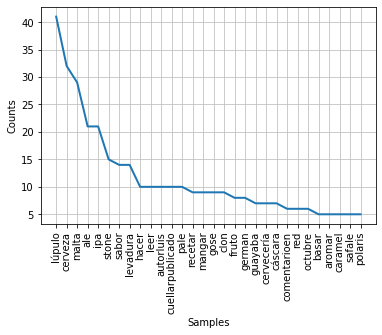

In [49]:
vizualizarTokens(freq_lem)

In [71]:
# def frecuenciaPalabras(tokens):
#     freq = nltk.FreqDist(tokens)
#     for palabra,valor in freq.items():
#         print(f"{palabra}: {valor}")
#     return freq

In [79]:
# for palabra,valor in freq_lem.items():
#     print(f"{palabra}: {valor}")

In [103]:
# import operator
# clients_sort = sorted(clients.items(), key=operator.itemgetter(1), reverse=True)
# for name in enumerate(clients_sort):
#     print(name[1][0], 'has spend', clients[name[1][0]])

In [83]:
# l = [f"{i}: {j}" for i,j in freq_lem.items()]

In [98]:
import operator
items_sort = sorted(freq_lem.items(), key=operator.itemgetter(1), reverse=True)
for name in enumerate(items_sort):
    print(name[1][0], '=', freq_lem[name[1][0]])

lúpulo = 41
cerveza = 32
malta = 29
ale = 21
ipa = 21
stone = 15
sabor = 14
levadura = 14
hacer = 10
leer = 10
autorluis = 10
cuellarpublicado = 10
pale = 10
recetar = 9
mangar = 9
gose = 9
clon = 9
fruto = 8
german = 8
guayaba = 7
cervecería = 7
cáscara = 7
comentarioen = 6
red = 6
octubre = 6
basar = 5
aromar = 5
caramel = 5
safale = 5
polaris = 5
saison = 5
wheat = 5
utilización = 5
azacca = 5
idaho = 5
scott = 5
mandarín = 5
naranja = 5
preparación = 4
utilizar = 4
además = 4
sigmund = 4
voss = 4
mosaic = 4
sublimely = 4
cantidad = 4
clásico = 4
brewing = 4
librar = 4
black = 4
comentariosen = 4
noviembre = 4
coriander = 4
double = 4
amber = 4
levitation = 4
año = 4
dry = 4
julio = 4
janish = 4
sapwood = 4
cellars = 4
artesanal = 3
experimentar = 3
ipas = 3
kveik = 3
steele = 3
cervecero = 3
ser = 3
munich = 3
iii = 3
amarillo = 3
chinook = 3
estrategia = 3
inscribir = 3
styrian = 3
aurora = 3
ruination = 3
cuerpo = 3
alto = 3
cítrico = 3
bichar = 3
adaptación = 3
chelas = 3
gracia